## [95-Unique Binary Search Trees II](https://leetcode.com/problems/unique-binary-search-trees-ii/description/)

问题难度: &clubs; &clubs; &clubs;

### 问题描述

给定一个整数`n`, 生成所有由`1...n`构成的/结构上唯一的`BST's`(`binary search tree`, 二叉检索树).

**示例**
```
Input: 3
Output:
[
  [1,null,3,2],
  [3,2,null,1],
  [3,1,null,null,2],
  [2,1,3],
  [1,null,2,null,3]
]
解释:上面的输出对应下面5个唯一的BST's:

   1         3     3      2      1
    \       /     /      / \      \
     3     2     1      1   3      2
    /     /       \                 \
   2     1         2                 3
```

### 解题思路

这道题目与上周做的第`96`题有一定的相似之处, 只不过这一次需要把具体的遍历路径返回. 首先, 我们将`i`从序列`1...n`中取出, 并将其作为当前树的根节点. 然后可以使用`i-1`个元素作为左树的元素, 剩下的`n-i`个元素作为右子树的元素. 正如我们之前讨论的, 这会生成`G(i-1)`中不同的左子树和`G(n-i)`种不同的右子树, 其中`G`是笛卡尔数.

96_BST.png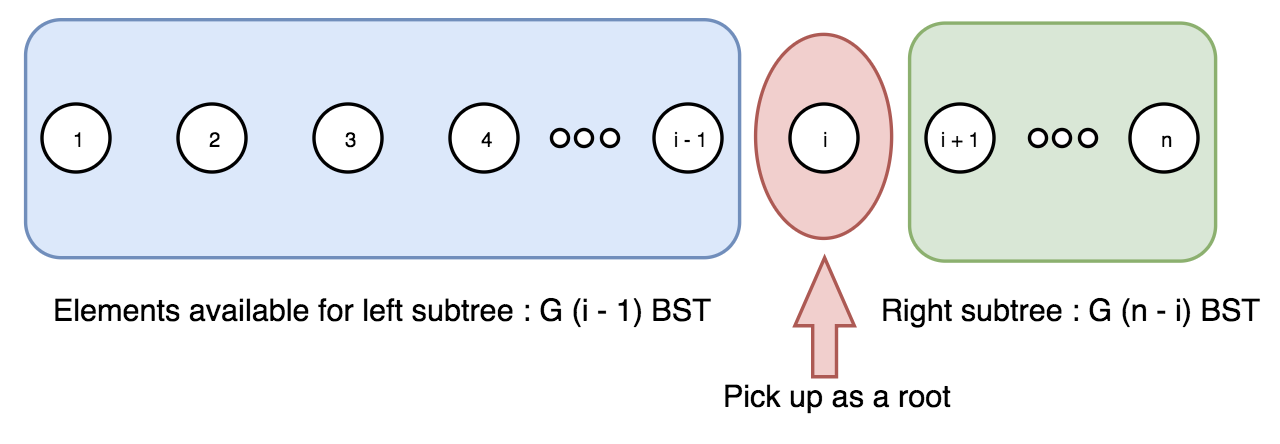

现在, 我们对于序列`1...i-1`重复上面的步骤来构建所有的左子树, 然后对于`i+1...n`来构建所有的右子树.

这样,我们就可以得到根`i`和两个可能的左子树和右子树列表. 最后一步是遍历两个列表来将左子树和右子树连接到根的两边.

时间复杂度: 主要的计算花在给定一个根之后构造所有可能的子树, 将会调用`n`次, 时间复杂度为`nG(n)`.

### 代码

In [1]:
# Definition for a binary tree node.
class TreeNode(object):
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

class Solution(object):
    def generateTrees(self, n):
        """
        :type n: int
        :rtype: List[TreeNode]
        """
        ans = list()
        return self.generateTreesRec(1, n) if n >= 1 else ans
        
    def generateTreesRec(self, start, end):
        if start > end:
            return [None,]
        ans = []
        for i in range(start, end + 1): # pick i as root
            left_trees = self.generateTreesRec(start, i-1)
            right_trees = self.generateTreesRec(i+1, end)
            
            for left in left_trees:
                for right in right_trees:
                    cur_tree = TreeNode(i)
                    cur_tree.left = left
                    cur_tree.right = right
                    ans.append(cur_tree)
        return ans

## [97- Interleaving String](https://leetcode.com/problems/interleaving-string/description/)

问题难度: &clubs; &clubs; &clubs; &clubs; &clubs;

### 问题描述

给定三个字符串`s_1`, `s_2`和`s_3`, 判断`s_3`是否由`s_1`和`s_2`交叉构成.

**示例1**
```
Input: s1 = "aabcc", s2 = "dbbca", s3 = "aadbbcbcac"
Output: true
```

**示例2**
```
Input: s1 = "aabcc", s2 = "dbbca", s3 = "aadbbbaccc"
Output: false
```

### 解题思路

**方法1: 暴力破解法**

最简单的想法是找到两个给定字符串`s_1`和`s_2`的所有可能交叉字符串. 我们使用递归来实现这个方法. 针对`s_1`当前字符, 可以将其添加到字符串末尾, 判断是否与`s_3`相等, 也可以使用`s_2`当前的字符, 将其添加到末尾, 只要有一个满足条件即可, 不过有一点需要注意的是: 即使当前满足相等的条件, 那么也要看是否已经`s_1`和`s_2`是否也已经到了末尾.

时间复杂度为`O(2^{m+n})`, 其中`m`和`n`分别为`s_1`和`s_2`的长度.

提交尝试了一下, 果然超出时间限制了...

**方法2: 带记忆的暴力破解**

思考一下, 其实上面的方法其实会进行大量重复的工作, 那么我们想想, 是否可以存储一下已经比较过的结果呢? 在上面方法的基础上,使用一个`memo[i][j]`的二维数组存储一下已经比较过的字符串即可.

嗯, 时间复杂度依旧是`O(2^{m+n})`, 但是由于减少了许多无畏的比较, 减少了实际计算的时间.然后`AC`了.

**方法3: 动态规划法(二维数组)**

老规矩, 之前看到过一种说法...只要是字符串相关的题目都可以用动态规划法解决.

动态规划法第一步: 将问题使用数学的形式表达出来--使用一个二维数组`dp[i][j]`来记录到`s_1`的第`i`位和到`s_2`的第`j`位(从`1`开始计数),是否与`s_3`的前`i+j+2`的字符串交叉匹配. 下面来看看递推公式:
- 如果`i==0 and j==0`, 那么`dp[i][j] = True`
- 如果`i==0 and j>0`, 那么`dp[i][j] = dp[i][j-1] and s2[j-1] == s[i+j-1]`
- 如果`i>0 and j == 0`, 那么`dp[i][j] = dp[i-1][j] and s1[i-1] == s[i+j-1]`
- 其它情况: `dp[i][j] = (dp[i-1][j] and s1[i-1] == s[i+j-1]) or (dp[i][j-1] and s2[j-1] == s[i+j-1])`

最后返回`dp[len(s1)][len(s2)]`即可. 此时时间复杂度为`O(m*n)`, 空间复杂度为`O(m*n)`.

**方法4: 动态规划法(一维数组)**

看看发现其实可以只使用一个一维数组来存储动态形式, 因为在前一个方法中, 每次只用到了一个之前的值.其实我们每次只需要维护一个长度为`O(n)`的一维数组即可.

此时时间复杂度为`O(m*n)`, 空间复杂度为`O(n)`.

### 代码

In [16]:
class Solution(object):
    def isInterleave(self, s1, s2, s3):
        """
        :type s1: str
        :type s2: str
        :type s3: str
        :rtype: bool
        """
        if len(s1) + len(s2) != len(s3):
            return False
        def check(s1, s2, s3, i, j, res):
            if res == s3 and i == len(s1) and j == len(s2):
                return True
            ans = False
            if i < len(s1):
                ans = ans or check(s1, s2, s3, i+1, j, res + s1[i])
            if j < len(s2):
                ans = ans or check(s1, s2, s3, i, j+1, res + s2[j])
            return ans
        return check(s1, s2, s3, 0, 0, "")

    def isInterleaveMemo(self, s1, s2, s3):
        """
        :type s1: str
        :type s2: str
        :type s3: str
        :rtype: bool
        """
        if len(s1) + len(s2) != len(s3):
            return False
        def check(s1, s2, s3, i, j, k, memo):
            if i == len(s1):
                return s2[j:] == s3[k:]
            if j == len(s2):
                return s1[i:] == s3[k:]
            if memo[i][j] >= 0:
                return True if memo[i][j] == 1 else False
            ans = False
            if (s1[i] == s3[k] and check(s1, s2, s3, i+1, j, k+1, memo) or (s2[j] == s3[k] and check(s1, s2, s3, i, j+1, k+1, memo))):
                ans = True
            memo[i][j] = 1 if ans else 0
            return ans
        memo = [[-1 for _ in range(len(s2))] for _ in range(len(s1))]
        return check(s1, s2, s3, 0, 0, 0, memo)
    
    def isInterleaveDP(self, s1, s2, s3):
        """
        :type s1: str
        :type s2: str
        :type s3: str
        :rtype: bool
        """
        if len(s1) + len(s2) != len(s3):
            return False
        dp = [[False for _ in range(len(s2)+1)] for _ in range(len(s1)+1)]
        for i in range(len(s1)+1):
            for j in range(len(s2)+1):
                if i == 0 and j == 0:
                    dp[i][j] = True
                elif i == 0:
                    dp[i][j] = dp[i][j-1] and s2[j-1] == s3[i+j-1]
                elif j == 0:
                    dp[i][j] = dp[i-1][j] and s1[i-1] == s3[i+j-1]
                else:
                    dp[i][j] = (dp[i-1][j] and s1[i-1] == s3[i+j-1]) or (dp[i][j-1] and s2[j-1] == s3[i+j-1])
        return dp[len(s1)][len(s2)]
    
    def isInterleaveDP1D(self, s1, s2, s3):
        """
        :type s1: str
        :type s2: str
        :type s3: str
        :rtype: bool
        """
        if len(s1) + len(s2) != len(s3):
            return False
        dp = [False for _ in range(len(s2)+1)]
        for i in range(len(s1)+1):
            for j in range(len(s2)+1):
                if i == 0 and j == 0:
                    dp[j] = True
                elif i == 0:
                    dp[j] = dp[j-1] and s2[j-1] == s3[i+j-1]
                elif j == 0:
                    dp[j] = dp[j] and s1[i-1] == s3[i+j-1]
                else:
                    dp[j] = (dp[j] and s1[i-1] == s3[i+j-1]) or (dp[j-1] and s2[j-1] == s3[i+j-1])
        return dp[len(s2)]

In [17]:
s1 =  "aac"
s2 = "abad"
s3 = "aabadac"
s = Solution()
print(s.isInterleaveDP1D(s1, s2, s3))

True


## [98-Validate Binary Search Tree](https://leetcode.com/problems/validate-binary-search-tree/description/)

问题难度: &clubs; &clubs; &clubs;

### 问题描述

给定一个二叉树, 判断其是否是一个有效的`BST`(`binary search tree`, 搜索二叉树).

假设`BST`的定义如下:
- 一个节点的左子树中只能包含小于该节点的键
- 节点的右子树中只能包含大于该节点的键
- 左子树和右子树必须也得是`BST`

**示例1**
```
Input:
    2
   / \
  1   3
Output: true
```

**示例2**
```
    5
   / \
  1   4
     / \
    3   6
Output: false
解析: 输入为[5,1,4,null,null,3,6],根节点是 5 但是其右子树中包含节点 4.
```

### 解题思路

## [98-Validate Binary Search Tree](https://leetcode.com/problems/validate-binary-search-tree/description/)

问题难度: &clubs; &clubs; &clubs;

### 问题描述

给定一个二叉树, 判断其是否是一个有效的`BST`(`binary search tree`, 搜索二叉树).

`BST`的定义如下:
- 节点的左子树只能包含**小于**该节点值的键
- 节点的右子树只能包含**大于**该节点值的键
- 左子树和右子树必须也是二进制检索树

**示例1**
```
Input:
    2
   / \
  1   3
Output: true
```

**示例2**
```
    5
   / \
  1   4
     / \
    3   6
Output: false
解释: 输入为 [5,1,4,null,null,3,6].根节点的值为5, 但是其右子树的节点为4.
```

### 解题思路

可以换个思路: 使用中序遍历的方法来判断数组是否升序排列即可.

In [1]:
# Definition for a binary tree node.
class TreeNode(object):
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

class Solution(object):
    def isValidBST(self, root):
        """
        :type root: TreeNode
        :rtype: bool
        """
        cur = root
        stack = list()
        last_val = None
        while cur is not None or len(stack) > 0:
            while cur is not None:
                stack.append(cur)
                cur = cur.left
            cur = stack[-1]
            stack = stack[:-1]
            if last_val is None:
                last_val = cur.val
            else:
                if last_val < cur.val:
                    last_val = cur.val
                else:
                    return False
            cur = cur.right
        return True
            